# PID Controller Visualizer
Basic PID implementation in Python to demonstrate how the P, I, and D individually affect the performance of the controller.
<br/>
<br/>
Author: Morgan Visnesky 
<br/>
Date: 01-01-2021

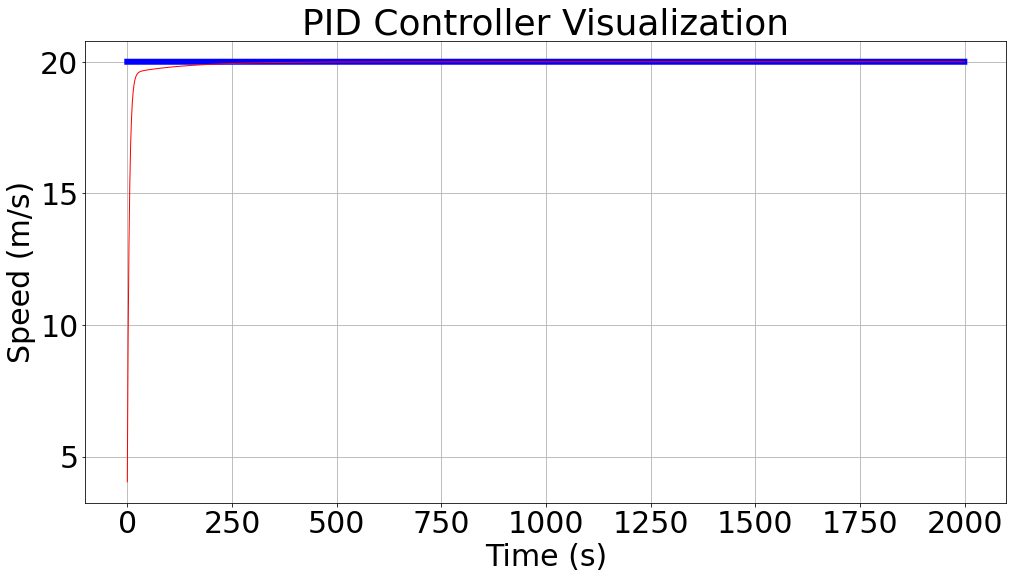

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

time_steps = 2000
t = np.arange(0, time_steps, 1) # time values in seconds
PIDvals = [] # holds values from PID 
constVal = [] # holds constant value that PID is attempting to reach 


previousTime = 0
position = 0
totalError = 0
lastError = 0
Kp = 0.202 # Proportional component of PID
Kd = 0.207 # Derivitive component of PID
Ki = 0.00015 # Integral component of PID

GOAL = 20 # constant value the controller will try and navigate to.

# For loop fills PIDvals array with PID controller values that correspond to each time
# step in the t array.
for i in range(time_steps):
  constVal.append(GOAL)

  currentTime = t[i]*10
  if i != 0:
    previousTime = t[i-1]*10
  else:
    previousTime = 0
  elapsedTime = (currentTime - previousTime)

  error = GOAL - position
  totalError += error * elapsedTime

  if elapsedTime != 0:
    derivError = (error-lastError) // elapsedTime
  else:
    derivError = 0

  posError = (Kp * error) + (Ki * totalError) + (Kd * derivError) # PID equation
  lastError = error
  position = position + posError
  PIDvals.append(position) # appends the calculated PID value for this time step to the array
  previousTime = currentTime
  

fig, ax = plt.subplots()
figure = matplotlib.pyplot.gcf() # gcf() = get current feature
figure.set_size_inches(16.5, 8.5) # resizes plot

ax.plot(t, constVal, c='b',linewidth=6) # plots constant values
ax.plot(t, PIDvals,c='r', linewidth=1) # plots PID values

# Sets labels for plot
ax.set(xlabel='Time (s)', ylabel='Speed (m/s)', title='PID Controller Visualization')

ax.grid() # Adds grid lines to plot
plt.rcParams.update({'font.size': 30}) # Changes font size of plot labels

#fig.savefig("PID_test.png") 
plt.show() # Displays plot

# PID Animation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
figure = matplotlib.pyplot.gcf() # gcf() = get current feature
figure.set_size_inches(16.5, 4.5) # resizes plot
plt.close()


ax.set_xlim(( 0, 2000))
ax.set_ylim((0, 30))



ax.time_steps = 2000
ax.t = np.arange(0, time_steps, 1) # time values in seconds
ax.PIDvals = [] # holds values from PID 
ax.constVal = [] # holds constant value that PID is attempting to reach 


ax.previousTime = 0
ax.position = 0
ax.totalError = 0
ax.lastError = 0
ax.Kp = 0.202 # Proportional component of PID
ax.Kd = 0.807 # Derivitive component of PID
ax.Ki = 0.00015 # Integral component of PID

ax.GOAL = 20 # constant value the controller will try and navigate to.

line, = ax.plot([], [], 'o')
line2, = ax.plot([], [], lw=2) 

# initialization function: plot the background of each frame
def init():
    line.set_data([], []) 
    line2.set_data(ax.t, np.full(2000,20))
    return (line2,)

# animation function. This is called sequentially  
def animate(i):
    constVal.append(GOAL)

    ax.currentTime = t[i]*10
    if i != 0:
      ax.previousTime = t[i-1]*10
    else:
      ax.previousTime = 0
    elapsedTime = (ax.currentTime - ax.previousTime)

    error = ax.GOAL - ax.position
    ax.totalError += error * elapsedTime

    if elapsedTime != 0:
      derivError = (error-ax.lastError) // elapsedTime
    else:
      derivError = 0

    posError = (ax.Kp * error) + (ax.Ki * ax.totalError) + (ax.Kd * derivError) # PID equation
    ax.lastError = error
    ax.position = ax.position + posError
    PIDvals.append(ax.position) # appends the calculated PID value for this time step to the array
    ax.previousTime = ax.currentTime
    
    x = i #x = np.linspace(0, 2000, 1000)
    y = ax.position
    line.set_data(x, y)
    return (line,)

ax.set(xlabel='Time (s)', ylabel='Speed (m/s)', title='PID Controller Visualization')
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=250, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim